In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# The first data set:
## imdb.title.basics

In [2]:
title_basics = pd.read_csv("data/imdb.title.basics.csv.gz")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Check it out

In [3]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Duplicates

In [4]:
title_basics[title_basics.duplicated()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


Missing values

In [5]:
title_basics["genres"].isna().sum() / len(title_basics) * 100

3.7004598204510617

In [6]:
title_basics["runtime_minutes"].isna().sum() / len(title_basics) * 100

21.71762097657105

Right now, I only care about tconst (PK), runtime_minutes, and genres

In [7]:
title_basics.drop(columns=["primary_title", "original_title", "start_year"], inplace=True)

In [8]:
title_basics.head()

,tconst,runtime_minutes,genres
0,tt0063540,175.0,"Action,Crime,Drama"
1,tt0066787,114.0,"Biography,Drama"
2,tt0069049,122.0,Drama
3,tt0069204,NaN,"Comedy,Drama"
4,tt0100275,80.0,"Comedy,Drama,Fantasy"


How many genres are there?

In [9]:
genres = []
for i in range(len(title_basics)):
    if type(title_basics.genres[i]) == str:
        gen = title_basics.genres[i].split(",")
        for g in gen:
            if g not in genres:
                genres.append(g)

In [10]:
print(len(genres))
genres

27


['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

Create columns for those genres

In [11]:
action = []
crime = []
drama = []
biography = []
comedy = []
fantasy = []
horror = []
thriller = []
adventure = []
animation = []
documentary = []
history = []
mystery = []
scifi = []
romance = []
family = []
war = []
music = []
sport = []
western = []
musical = []
adult = []
news = []
talk_show = []
reality_TV = []
game_show = []
short = []

list_genres = [action, crime, drama, biography, comedy, fantasy, horror, thriller, adventure, animation,
               documentary, history, mystery, scifi, romance, family, war, music, sport, western, musical,
               adult, news, talk_show, reality_TV, game_show, short]

list_genres_names = ["action", "crime", "drama", "biography", "comedy", "fantasy", "horror", "thriller",
                     "adventure", "animation", "documentary", "history", "mystery", "scifi", "romance",
                     "family", "war", "music", "sport", "western", "musical", "adult", "news", "talk_show",
                     "reality_TV", "game_show", "short"]

In [12]:
def give_one(list_genres, index):
    list_genres[index].append(1)

In [13]:
def give_zeros(list_genres, list_i):
    for i in range(27):
        if i not in list_i:
            list_genres[i].append(0)

In [14]:
def fill_all_zeros(list_genres):
    for i in range(27):
        list_genres[i].append(0)

In [15]:
for i in range(len(title_basics)):
    if type(title_basics.genres[i]) == str:
        gen = title_basics.genres[i].split(",")
        list_i = []
        for g in gen:
            g = g.lower()
            if g == "sci-fi":
                g = "scifi"
            elif g == "talk-show":
                g = "talk_show"
            elif g == "reality-tv":
                g = "reality_TV"
            elif g == "game-show":
                g = "game_show"
            index = list_genres_names.index(g)
            give_one(list_genres, index)
            list_i.append(index)
        give_zeros(list_genres, list_i)
    else:
        fill_all_zeros(list_genres)

In [16]:
title_basics["action"] = action
title_basics["crime"] = crime
title_basics["drama"] = drama
title_basics["biography"] = biography
title_basics["comedy"] = comedy
title_basics["fantasy"] = fantasy
title_basics["horror"] = horror
title_basics["thriller"] = thriller
title_basics["adventure"] = adventure
title_basics["animation"] = animation
title_basics["documentary"] = documentary
title_basics["history"] = history
title_basics["mystery"] = mystery
title_basics["scifi"] = scifi
title_basics["romance"] = romance
title_basics["family"] = family
title_basics["war"] = war
title_basics["music"] = music
title_basics["sport"] = sport
title_basics["western"] = western
title_basics["musical"] = musical
title_basics["adult"] = adult
title_basics["news"] = news
title_basics["talk_show"] = talk_show
title_basics["reality_TV"] = reality_TV
title_basics["game_show"] = game_show
title_basics["short"] = short

Check to see if everything we have to this point is correct

In [17]:
title_basics.head()

,tconst,runtime_minutes,genres,action,crime,drama,biography,comedy,fantasy,horror,...,music,sport,western,musical,adult,news,talk_show,reality_TV,game_show,short
0,tt0063540,175.0,"Action,Crime,Drama",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,114.0,"Biography,Drama",0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,122.0,Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,NaN,"Comedy,Drama",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,80.0,"Comedy,Drama,Fantasy",0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
title_basics.tail()

,tconst,runtime_minutes,genres,action,crime,drama,biography,comedy,fantasy,horror,...,music,sport,western,musical,adult,news,talk_show,reality_TV,game_show,short
146139,tt9916538,123.0,Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146140,tt9916622,NaN,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146141,tt9916706,NaN,Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
146142,tt9916730,116.0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146143,tt9916754,NaN,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looks good

Now, we don't need the genres column anymore

In [19]:
title_basics.drop(columns="genres", inplace=True)

# The second data set
## imdb.title.ratings

In [20]:
title_ratings = pd.read_csv("data/imdb.title.ratings.csv.gz")
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


# Merging the two data frames

In [23]:
df = title_basics.merge(title_ratings, how='inner', on="tconst")
df.head()

,tconst,runtime_minutes,action,crime,drama,biography,comedy,fantasy,horror,thriller,...,western,musical,adult,news,talk_show,reality_TV,game_show,short,averagerating,numvotes
0,tt0063540,175.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.0,77
1,tt0066787,114.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7.2,43
2,tt0069049,122.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.9,4517
3,tt0069204,NaN,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.1,13
4,tt0100275,80.0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,6.5,119


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 31 columns):
tconst             73856 non-null object
runtime_minutes    66236 non-null float64
action             73856 non-null int64
crime              73856 non-null int64
drama              73856 non-null int64
biography          73856 non-null int64
comedy             73856 non-null int64
fantasy            73856 non-null int64
horror             73856 non-null int64
thriller           73856 non-null int64
adventure          73856 non-null int64
animation          73856 non-null int64
documentary        73856 non-null int64
history            73856 non-null int64
mystery            73856 non-null int64
scifi              73856 non-null int64
romance            73856 non-null int64
family             73856 non-null int64
war                73856 non-null int64
music              73856 non-null int64
sport              73856 non-null int64
western            73856 non-null int64
musical 

In [25]:
df["runtime_minutes"].isna().sum() / len(df) * 100

10.317374350086656

# EDA

In [26]:
action_movies = df[df.action == 1]
crime_movies = df[df.crime == 1]
drama_movies = df[df.drama == 1]
biography_movies = df[df.biography == 1]
comedy_movies = df[df.comedy == 1]
fantasy_movies = df[df.fantasy == 1]
horror_movies = df[df.horror == 1]
thriller_movies = df[df.thriller == 1]
adventure_movies = df[df.adventure == 1]
animation_movies = df[df.animation == 1]
documentary_movies = df[df.documentary == 1]
history_movies = df[df.history == 1]
mystery_movies = df[df.mystery == 1]
scifi_movies = df[df.scifi == 1]
romance_movies = df[df.romance == 1]
family_movies = df[df.family == 1]
war_movies = df[df.war == 1]
music_movies = df[df.music == 1]
sport_movies = df[df.sport == 1]
western_movies = df[df.western == 1]
musical_movies = df[df.musical == 1]
adult_movies = df[df.adult == 1]
news_movies = df[df.news == 1]
talk_show_movies = df[df.talk_show == 1]
reality_TV_movies = df[df.reality_TV == 1]
game_show_movies = df[df.game_show == 1]
short_movies = df[df.short == 1]

**Note**

We're not dealing with adult movies (3 samples), talk shows (0 sample), reality TV's (17 samples), game shows (2 samples), and short movies (1 sample) due to not having enough data in those categories.

In [27]:
list_movies = [action_movies, crime_movies, drama_movies, biography_movies, comedy_movies, fantasy_movies,
               horror_movies, thriller_movies, adventure_movies, animation_movies, documentary_movies,
               history_movies, mystery_movies, scifi_movies, romance_movies, family_movies, war_movies,
               music_movies, sport_movies, western_movies, musical_movies, news_movies]

list_genres_names_new = ["action", "crime", "drama", "biography", "comedy", "fantasy", "horror", "thriller",
                         "adventure", "animation", "documentary", "history", "mystery", "scifi", "romance",
                         "family", "war", "music", "sport", "western", "musical", "news"]

In [28]:
list_movies_ave_rate_mean = [action_movies.averagerating.mean(), crime_movies.averagerating.mean(),
                             drama_movies.averagerating.mean(), biography_movies.averagerating.mean(),
                             comedy_movies.averagerating.mean(), fantasy_movies.averagerating.mean(),
                             horror_movies.averagerating.mean(), thriller_movies.averagerating.mean(),
                             adventure_movies.averagerating.mean(), animation_movies.averagerating.mean(),
                             documentary_movies.averagerating.mean(), history_movies.averagerating.mean(),
                             mystery_movies.averagerating.mean(), scifi_movies.averagerating.mean(),
                             romance_movies.averagerating.mean(), family_movies.averagerating.mean(),
                             war_movies.averagerating.mean(), music_movies.averagerating.mean(),
                             sport_movies.averagerating.mean(), western_movies.averagerating.mean(),
                             musical_movies.averagerating.mean(), news_movies.averagerating.mean()]

zipped_pairs = list(zip(list_movies_ave_rate_mean, list_genres_names_new))
zipped_pairs.sort(reverse=True)
names_mean = []
list_mean = []
for i in zipped_pairs:
    list_mean.append(i[0])
    names_mean.append(i[1])

In [29]:
list_movies_ave_rate_variance = [action_movies.averagerating.var(), crime_movies.averagerating.var(),
                                 drama_movies.averagerating.var(), biography_movies.averagerating.var(),
                                 comedy_movies.averagerating.var(), fantasy_movies.averagerating.var(),
                                 horror_movies.averagerating.var(), thriller_movies.averagerating.var(),
                                 adventure_movies.averagerating.var(), animation_movies.averagerating.var(),
                                 documentary_movies.averagerating.var(), history_movies.averagerating.var(),
                                 mystery_movies.averagerating.var(), scifi_movies.averagerating.var(),
                                 romance_movies.averagerating.var(), family_movies.averagerating.var(),
                                 war_movies.averagerating.var(), music_movies.averagerating.var(),
                                 sport_movies.averagerating.var(), western_movies.averagerating.var(),
                                 musical_movies.averagerating.var(), news_movies.averagerating.var()]

zipped_pairs = list(zip(list_movies_ave_rate_variance, list_genres_names_new))
zipped_pairs.sort()
names_var = []
list_var = []
for i in zipped_pairs:
    list_var.append(i[0])
    names_var.append(i[1])

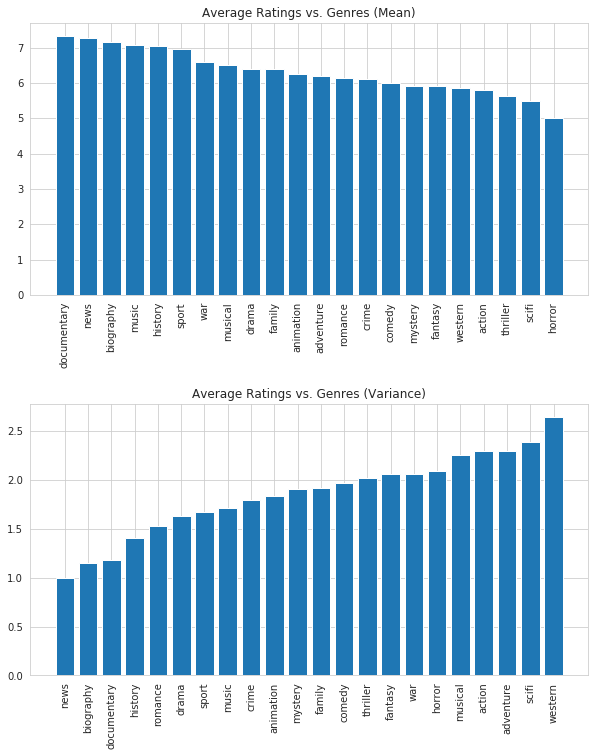

In [30]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(211)
ax.set_xticks(range(22))
ax.set_xticklabels(names_mean, rotation="vertical")
plt.bar(range(22), list_mean)
ax.set_title("Average Ratings vs. Genres (Mean)")

ax = fig.add_subplot(212)
ax.set_xticks(range(22))
ax.set_xticklabels(names_var, rotation="vertical")
plt.bar(range(22), list_var)
ax.set_title("Average Ratings vs. Genres (Variance)")

plt.subplots_adjust(hspace=0.4)

plt.show()

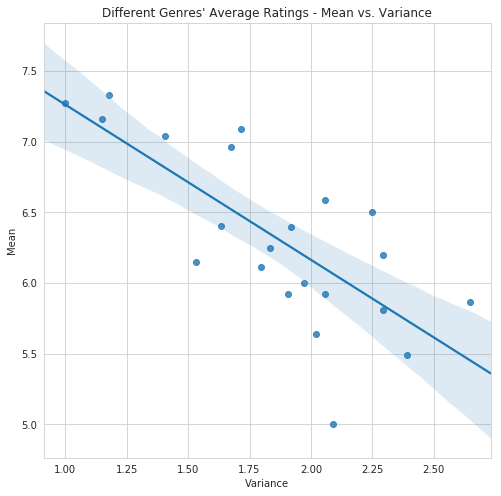

In [31]:
fig = plt.figure(figsize=(8,8))
sns.regplot(list_movies_ave_rate_variance, list_movies_ave_rate_mean);
plt.title("Different Genres' Average Ratings - Mean vs. Variance");
plt.xlabel("Variance");
plt.ylabel("Mean");

The points at the top left of the graph represent the genres that have stable and high average ratings. Those genres are: news, biography, documentary, and history. These categories focus on facts.